# Library and Version


In [69]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(sys.version)

3.9.1 (default, Feb 13 2021, 04:33:22) 
[Clang 12.0.0 (clang-1200.0.32.29)]


# Reading data

In [97]:
business = pd.read_json('yelp_academic_dataset_business.json', lines = True)


KeyboardInterrupt: 

In [10]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [11]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,209393.000000,209393.000000,209393.000000,209393.000000,209393.000000
mean,38.579934,-97.390217,3.538055,36.937505,0.806632
std,4.940448,16.718535,1.023543,123.343597,0.394940
min,21.497258,-158.025525,1.000000,3.000000,0.000000
25%,33.638658,-112.269476,3.000000,4.000000,1.000000
50%,36.147408,-111.743531,3.500000,9.000000,1.000000
75%,43.611693,-79.972679,4.500000,27.000000,1.000000
max,51.299943,-72.806550,5.000000,10129.000000,1.000000


In [12]:
business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

# Preprocessing Data

## Filtering Open Businesses

In [22]:
# 1 = open, 0 = closed
business_open = business[business['is_open']==1]

In [25]:
print(f"Length before: {len(business)}")
print(f"Length after: {len(business_open)}")

Before: 209393
After: 168903


In [26]:
business_open.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."


In [28]:
chosen_categories = pd.read_csv('categories.csv')

In [29]:
chosen_categories.head()

,Unnamed: 0,categories,food
0,Restaurants,63944,1.0
1,Shopping,34644,NaN
2,Food,32991,1.0
3,Home Services,22487,NaN
4,Beauty & Spas,20520,NaN


In [92]:
chosen_categories.shape

(1336, 3)

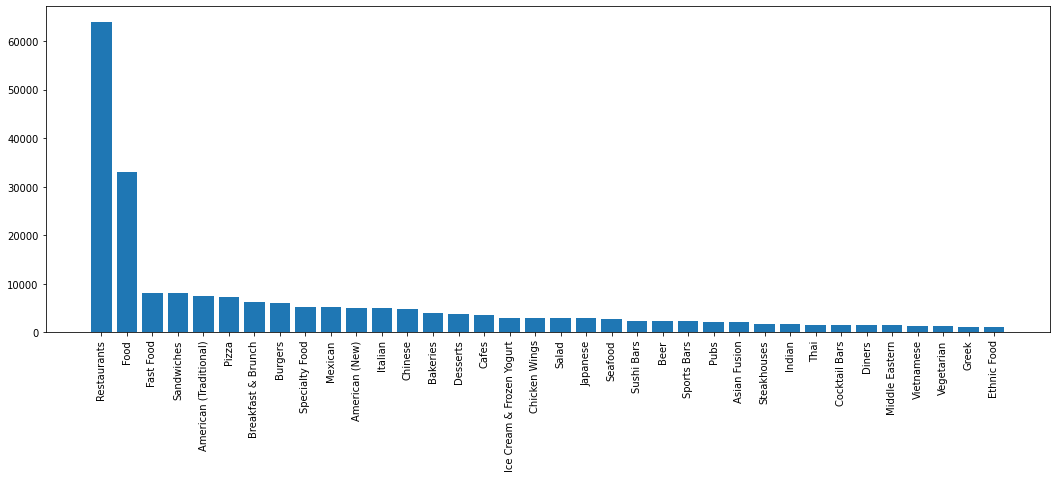

In [91]:
plt.figure(figsize=(18,6))
plt.bar(chosen_categories[chosen_categories['food'] == 1].iloc[0:36,0], chosen_categories[chosen_categories['food'] == 1].iloc[0:36,1])
plt.xticks(rotation=90)
plt.show()


In [44]:
chosen_list = chosen_categories[chosen_categories['food'] == 1].iloc[:,0].tolist()
business_restaurants = business_open[business_open['categories'].str.contains('|'.join(chosen_list),case=False, na=False)]

In [96]:
print(f"Before: {len(business_open)}")
print(f"After: {len(business_restaurants)}")
business_restaurants.head()

Before: 168903
After: 58060


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
12,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,2831 Parmenter St,Middleton,WI,53562,43.105310,-89.510142,3.5,6,1,"{'BikeParking': 'True', 'Caters': 'True', 'Whe...","Desserts, Food, Ice Cream & Frozen Yogurt","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
23,mKTq1T_IAplDpHUcMzOXkw,Tipsy Ryde,,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,1,{'BusinessAcceptsCreditCards': 'True'},"Hotels & Travel, Transportation, Taxis, Beer, ...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",None


## Categorizing Data
Because the data is stored in JSON format, there are only few attributes with single value per cell are read in correctly, such as `business_id`, `name`, `address` , `city`, `state`, `postal_code`, `latitude`, `longitude`, `stars`, `review_count`, and `is_open`. The rest of the attributes, that is `attributes`, `categories`, and `hours` are read in as strings since they are stored as lists of dictionaries or even nested dictionaries. Therefore, these three attributes need to be preprocessed to extract the correction information relating to these three fields.

In [3]:
# Converting a string of categories into a list of categories
df["categories"] = df["categories"].str.split(', ')
# Applying pd.explode() to split a list of categories into separate duplicate rows
df_explode = df.explode('categories')

# The total number of different categories
categories = df_explode.categories.value_counts()
len(categories)

1336

In [20]:
# Creating a csv file of the categories so we can manually filter our set of interested categories
# try:
#     f = open("categories.csv")
# except IOError:
#     categories.to_csv('categories.csv', mode='w')
# finally:
#     f.close()

,Unnamed: 0,categories,food
0,Restaurants,63944,1.0
1,Shopping,34644,NaN
2,Food,32991,1.0
3,Home Services,22487,NaN
4,Beauty & Spas,20520,NaN


# User Data

In [98]:
reviews = pd.read_json('yelp_academic_dataset_review.json', lines = True)

KeyboardInterrupt: 